In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import CSVLogger
import pandas as pd
import numpy as np
from tensor_model_maker import tensor_model1
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

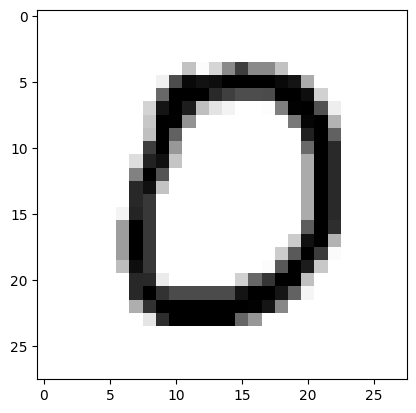

In [3]:
plt.figure()
plt.imshow(x_test[10], cmap=plt.cm.binary)
plt.show()

In [20]:
# Run this code if you still dont have the data saved in the computer

# Numpy arrays are turned into lists first and then appended on the list are the flattened values of the images
# After that the whole list is then reshaped into a numpy array
# This is a lot more faster at the cost of memory

# x_train_flattened = []
# for image in x_train:
#     flattened  = np.ndarray.ravel(image, order='C')
#     x_train_flattened.append(list(flattened))
# x_train_flattened = np.reshape(x_train_flattened, newshape=(np.shape(x_train)[0], np.shape(x_train)[1]**2))

# x_test_flattened = []
# for image in x_test:
#     flattened  = np.ndarray.ravel(image, order='C')
#     x_test_flattened.append(list(flattened))
# x_test_flattened = np.reshape(x_test_flattened, newshape=(np.shape(x_test)[0], np.shape(x_test)[1]**2))

# np.save("../datas/mnist_number_dataset/x_train_flattened.npy", x_train_flattened)
# np.save("../datas/mnist_number_dataset/y_train_flattened.npy", y_train)

# np.save("../datas/mnist_number_dataset/x_test_flattened.npy", x_test_flattened)
# np.save("../datas/mnist_number_dataset/y_test_flattened.npy", y_test)

In [4]:
x_train_flattened = np.load("../datas/mnist_number_dataset/x_train_flattened.npy")
y_train_flattened = np.load("../datas/mnist_number_dataset/y_train_flattened.npy")
x_test_flattened = np.load("../datas/mnist_number_dataset/x_test_flattened.npy")
y_test_flattened = np.load("../datas/mnist_number_dataset/y_test_flattened.npy")

In [5]:
tensor_model1.make_model(x_train_flattened, y_train_flattened, num_of_inputs=784, num_of_outputs=10, num_of_hidden_layers=5, epochs=50, batch_size=1000, save_freq=1500, num_of_neurons_of_hidden_layers=128)

Epoch 1/50
60/60 [==============================] - 6s 54ms/step - loss: 1.6304 - accuracy: 0.8186
Epoch 2/50
60/60 [==============================] - 4s 64ms/step - loss: 0.8551 - accuracy: 0.9495
Epoch 3/50
60/60 [==============================] - 3s 55ms/step - loss: 0.6881 - accuracy: 0.9635
Epoch 4/50
60/60 [==============================] - 2s 33ms/step - loss: 0.5887 - accuracy: 0.9724
Epoch 5/50
60/60 [==============================] - 2s 39ms/step - loss: 0.5300 - accuracy: 0.9741
Epoch 6/50
60/60 [==============================] - 2s 33ms/step - loss: 0.4739 - accuracy: 0.9790
Epoch 7/50
60/60 [==============================] - 2s 35ms/step - loss: 0.4382 - accuracy: 0.9796
Epoch 8/50
60/60 [==============================] - 2s 36ms/step - loss: 0.4043 - accuracy: 0.9821
Epoch 9/50
60/60 [==============================] - 2s 36ms/step - loss: 0.3765 - accuracy: 0.9839
Epoch 10/50
60/60 [==============================] - 2s 30ms/step - loss: 0.3516 - accuracy: 0.9851
Epoch 11/

In [4]:
load_num_model = tensor_model1()

In [5]:
load_num_model.load_model("../trained_models\model3")

In [6]:
load_num_model.train_model(x_train_flattened, y_train_flattened, epochs=100, batch_size=100, save_freq=2000, save_param_excel=True, validation_data=(x_test_flattened, y_test_flattened))

Epoch 1/100
600/600 [==============================] - 8s 10ms/step - loss: 0.1925 - accuracy: 0.9650 - val_loss: 0.1913 - val_accuracy: 0.9656
Epoch 2/100
600/600 [==============================] - 6s 10ms/step - loss: 0.1727 - accuracy: 0.9725 - val_loss: 0.1961 - val_accuracy: 0.9658
Epoch 3/100
600/600 [==============================] - 6s 11ms/step - loss: 0.1661 - accuracy: 0.9756 - val_loss: 0.1879 - val_accuracy: 0.9714
Epoch 4/100
198/600 [========>.....................] - ETA: 4s - loss: 0.1546 - accuracy: 0.9791
Epoch 4: saving model to ../trained_models\model3/saved_per_train/train3\Epoch04_loss0.15
INFO:tensorflow:Assets written to: ../trained_models\model3/saved_per_train/train3\Epoch04_loss0.15\assets
600/600 [==============================] - 10s 16ms/step - loss: 0.1621 - accuracy: 0.9768 - val_loss: 0.1695 - val_accuracy: 0.9753
Epoch 5/100
600/600 [==============================] - 6s 9ms/step - loss: 0.1588 - accuracy: 0.9787 - val_loss: 0.2005 - val_accuracy: 0.965

In [8]:
model_test = tf.keras.models.load_model(r"../trained_models\model3\saved_per_train\train3\Epoch100_loss0.12")

In [18]:
model_test.predict(x_test_flattened)[1]

313/313 [==============================] - 1s 3ms/step


array([ -5.5302587,  -6.0359917,   4.915313 ,  -4.7028885, -10.857569 ,
       -12.59264  ,  -7.035051 ,  -4.5389795,  -5.526923 , -14.516237 ],
      dtype=float32)